importing Jupyter notebook from timegan.ipynb
Instructions for updating:
non-resource variables are not supported in the long term
importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from data_loading.ipynb
importing Jupyter notebook from discriminative_metrics.ipynb
importing Jupyter notebook from predictive_metrics.ipynb
importing Jupyter notebook from visualization_metrics.ipynb
phase2phase dataset is ready.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Start Embedding Network Training
step: 0/50000, e_loss: 0.2998
step: 1000/50000, e_loss: 0.0895
step: 2000/50000, e_loss: 0.0816
step: 3000/50000, e_loss: 0.0539
step: 4000/50000, e_loss: 0.0484
step: 5000/50000, e_loss: 0.0507
step: 

step: 14000/50000, d_loss: 1.0617, g_loss_u: 1.4164, g_loss_s: 0.0457, g_loss_v: 0.0382, e_loss_t0: 0.0082
step: 15000/50000, d_loss: 1.0923, g_loss_u: 1.6085, g_loss_s: 0.0444, g_loss_v: 0.0515, e_loss_t0: 0.0083
step: 16000/50000, d_loss: 1.5599, g_loss_u: 1.5663, g_loss_s: 0.0463, g_loss_v: 0.0723, e_loss_t0: 0.0082
step: 17000/50000, d_loss: 1.287, g_loss_u: 1.7205, g_loss_s: 0.0437, g_loss_v: 0.0532, e_loss_t0: 0.0076
step: 18000/50000, d_loss: 1.1092, g_loss_u: 1.8954, g_loss_s: 0.0474, g_loss_v: 0.0447, e_loss_t0: 0.0075
step: 19000/50000, d_loss: 1.398, g_loss_u: 1.4909, g_loss_s: 0.0424, g_loss_v: 0.0375, e_loss_t0: 0.0084
step: 20000/50000, d_loss: 1.1621, g_loss_u: 1.7699, g_loss_s: 0.0461, g_loss_v: 0.066, e_loss_t0: 0.0076
step: 21000/50000, d_loss: 1.2969, g_loss_u: 1.7821, g_loss_s: 0.0422, g_loss_v: 0.0715, e_loss_t0: 0.0069
step: 22000/50000, d_loss: 1.2176, g_loss_u: 1.4729, g_loss_s: 0.0398, g_loss_v: 0.0385, e_loss_t0: 0.0072
step: 23000/50000, d_loss: 1.127, g_loss

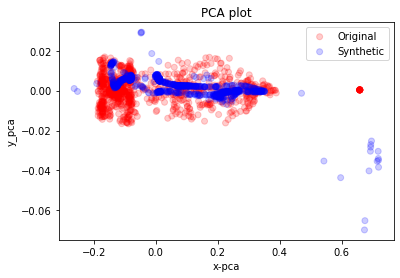

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.312584
[t-SNE] KL divergence after 300 iterations: 0.662632


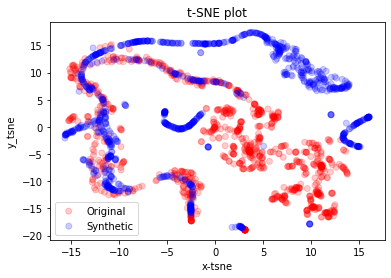

{'discriminative': 0.3236768384192096, 'predictive': 0.023036623434662683}


In [1]:
"""Time-series Generative Adversarial Networks (TimeGAN) Codebase.
Reference: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, 
"Time-series Generative Adversarial Networks," 
Neural Information Processing Systems (NeurIPS), 2019.
Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks
Last updated Date: April 24th 2020
Code author: Jinsung Yoon (jsyoon0823@gmail.com)
-----------------------------
main_timegan.py
(1) Import data
(2) Generate synthetic data
(3) Evaluate the performances in three ways
  - Visualization (t-SNE, PCA)
  - Discriminative score
  - Predictive score
"""

## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import import_ipynb
import argparse
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading
# 3. Metrics
from discriminative_metrics import discriminative_score_metrics
from predictive_metrics import predictive_score_metrics
from visualization_metrics import visualization


def main (args):
  """Main function for timeGAN experiments.
  
  Args:
    - data_name: sine, stock, or energy
    - seq_len: sequence length
    - Network parameters (should be optimized for different datasets)
      - module: gru, lstm, or lstmLN
      - hidden_dim: hidden dimensions
      - num_layer: number of layers
      - iteration: number of training iterations
      - batch_size: the number of samples in each batch
    - metric_iteration: number of iterations for metric computation
  
  Returns:
    - ori_data: original data
    - generated_data: generated synthetic data
    - metric_results: discriminative and predictive scores
  """
  ## Data loading
  if args.data_name in ['onephase', 'phase2phase','stock']:
    ori_data,idx = real_data_loading(args.data_name, args.seq_len, args.state)
    
  print(args.data_name + ' dataset is ready.')
    
  ## Synthetic data generation by TimeGAN
  # Set newtork parameters
  parameters = dict()  
  parameters['module'] = args.module
  parameters['hidden_dim'] = args.hidden_dim
  parameters['num_layer'] = args.num_layer
  parameters['iterations'] = args.iteration
  parameters['batch_size'] = args.batch_size
      
  generated_data = timegan(ori_data, parameters)   
  print('Finish Synthetic Data Generation')
  
  ## Performance metrics   
  # Output initialization
  metric_results = dict()
  
  # 1. Discriminative Score
  discriminative_score = list()
  for _ in range(args.metric_iteration):
    temp_disc = discriminative_score_metrics(ori_data, generated_data)
    discriminative_score.append(temp_disc)
      
  metric_results['discriminative'] = np.mean(discriminative_score)
      
  # 2. Predictive score
  predictive_score = list()
  for tt in range(args.metric_iteration):
    temp_pred = predictive_score_metrics(ori_data, generated_data)
    predictive_score.append(temp_pred)   
      
  metric_results['predictive'] = np.mean(predictive_score)     
          
  # 3. Visualization (PCA and tSNE)
  visualization(ori_data, generated_data, 'pca')
  visualization(ori_data, generated_data, 'tsne')
  
  ## Print discriminative and predictive scores
  print(metric_results)

  return ori_data, generated_data, metric_results, idx


if __name__ == '__main__':  
  
  # Inputs for the main function
  parser = argparse.ArgumentParser()
  parser.add_argument(
      '--data_name',
      choices=['onephase','phase2phase','stock'],
      default='phase2phase',
      type=str)
  parser.add_argument( #state parse 추가
      '--state',
      help='which partial',
      choices=['normal','fault'],
      default='normal',
      type=str)
  parser.add_argument(
      '--seq_len',
      help='sequence length',
      default=24,
      type=int)
  parser.add_argument(
      '--module',
      choices=['gru','lstm','lstmLN'],
      default='gru',
      type=str)
  parser.add_argument(
      '--hidden_dim',
      help='hidden state dimensions (should be optimized)',
      default=24,
      type=int)
  parser.add_argument(
      '--num_layer',
      help='number of layers (should be optimized)',
      default=3,
      type=int)
  parser.add_argument(
      '--iteration',
      help='Training iterations (should be optimized)',
      default=50000,
      type=int)
  parser.add_argument(
      '--batch_size',
      help='the number of samples in mini-batch (should be optimized)',
      default=128,
      type=int)
  parser.add_argument(
      '--metric_iteration',
      help='iterations of the metric computation',
      default=10,
      type=int)
  
  args = parser.parse_args(args=[]) 
  
  # Calls main function  
  ori_data, generated_data, metrics, idx = main(args)

In [2]:
ori_np=np.array(ori_data)

In [7]:
#generated_data 순서 원래대로 재조합
order=list()
for i in range(len(idx1)):
    order.append(np.where(idx1==i)[0][0])
    
g_reorder = list()
for i in range(len(generated_data1)):
    g_reorder.append(generated_data1[order[i]])
    
g_reorder=np.array(g_reorder)
#g_reorder=g_reorder[:,:,:3] #전압 데이터만 추출

In [5]:
g_Va=g_reorder[:,0,0]
g_Vb=g_reorder[:,0,1]
g_Vc=g_reorder[:,0,2]

In [8]:
#ori_data 순서 원래대로 재조합
o_reorder = list()
for i in range(len(ori_data)):
    o_reorder.append(ori_data[order[i]])
    
o_reorder=np.array(o_reorder)
#o_reorder=o_reorder[:,:,:3] #전압 데이터만 추출

In [7]:
o_Va=o_reorder[:,0,0]
o_Vb=o_reorder[:,0,1]
o_Vc=o_reorder[:,0,2]

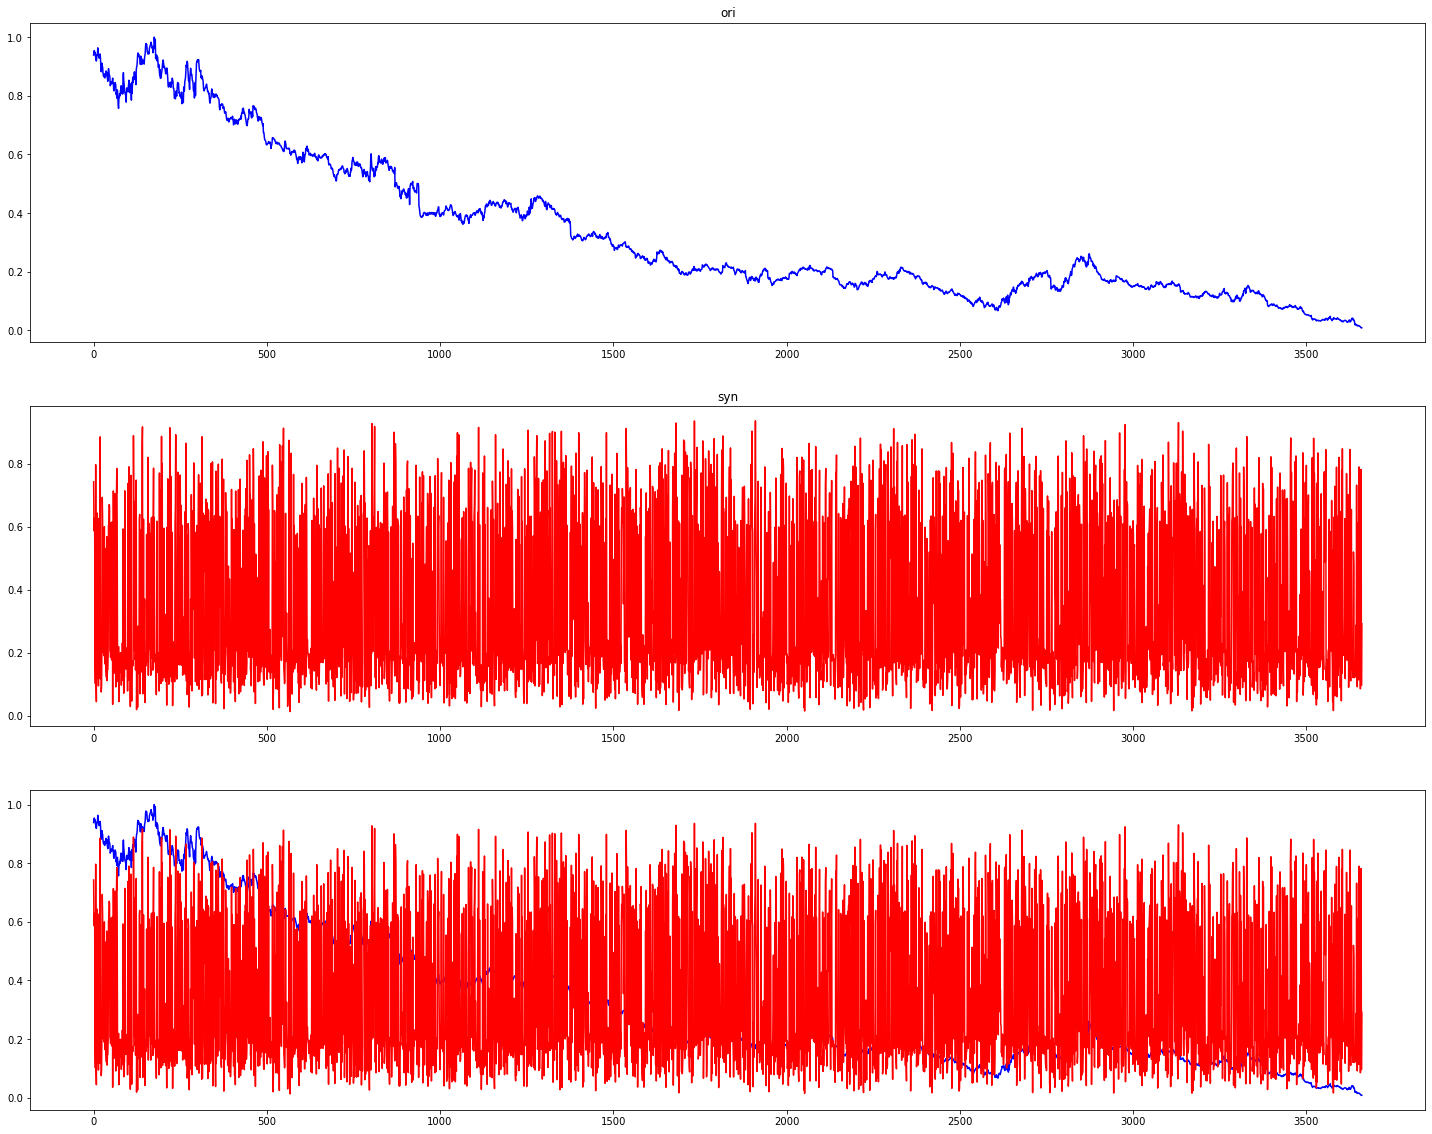

In [12]:
'''import matplotlib.pyplot as plt
fig,axes=plt.subplots(3,1,figsize=(25,20))
axes[0].plot(o_Va,c='b')
axes[0].set_title('ori')
axes[1].plot(g_Va,c='r')
axes[1].set_title('syn')
axes[2].plot(o_Va,c='b')
axes[2].plot(g_Va,c='r')'''
import matplotlib.pyplot as plt
fig,axes=plt.subplots(3,1,figsize=(25,20))
axes[0].plot(o_reorder[:,0,0],c='b')
axes[0].set_title('ori')
axes[1].plot(g_reorder[:,0,0],c='r')
axes[1].set_title('syn')
axes[2].plot(o_reorder[:,0,0],c='b')
axes[2].plot(g_reorder[:,0,0],c='r')

In [4]:
np.save('C:/Users/sewoong/Desktop/elec car/ori_fault3',ori_np)
np.save('C:/Users/sewoong/Desktop/elec car/generated_data_fault3',generated_data)
#order=np.array(order)
#np.save('C:/Users/sewoong/Desktop/elec car/order_2',order)

In [3]:
np.save('C:/Users/sewoong/Desktop/elec car/ori_normal4',ori_np)
np.save('C:/Users/sewoong/Desktop/elec car/generated_data_normal4',generated_data)

In [3]:
np.save('C:/Users/sewoong/Desktop/elec car/p2p_ori_normal2',ori_np)
np.save('C:/Users/sewoong/Desktop/elec car/p2p_generated_data_normal2',generated_data)